In [ ]:
# Importing Libraries
import numpy as np
import pandas as pd

In [ ]:
# Reading Iris Dataset from Local Drive
from google.colab import files
uploaded = files.upload()

Saving iris.csv to iris.csv


In [ ]:
iris_data = pd.read_csv("iris.csv") 

In [ ]:
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
# Train-Test Split
from sklearn.model_selection import train_test_split


In [ ]:
X = iris_data.iloc[:, :-1].values
Y = iris_data.iloc[:, -1].values.reshape(-1,1)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=41)

In [ ]:
from sklearn import tree

In [ ]:
# Fit The Decision Tree Classifier on Training Dataset
classifier = tree.DecisionTreeClassifier(min_samples_split=3, max_depth=3)


In [ ]:
classifier.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
Y_pred = classifier.predict(X_test) 


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  #for visualizing tree 
accuracy_score(Y_test, Y_pred)


0.8333333333333334

In [ ]:
print("Classification Report - \n", classification_report(Y_test, Y_pred))

Classification Report - 
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         9
  versicolor       0.80      0.73      0.76        11
   virginica       0.73      0.80      0.76        10

    accuracy                           0.83        30
   macro avg       0.84      0.84      0.84        30
weighted avg       0.84      0.83      0.83        30



In [ ]:
cm = confusion_matrix(Y_test, Y_pred)

In [ ]:
cm

array([[9, 0, 0],
       [0, 8, 3],
       [0, 2, 8]])

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
# for encoding

Text(0.5, 1.0, 'Accuracy Score: 0.8333333333333334')

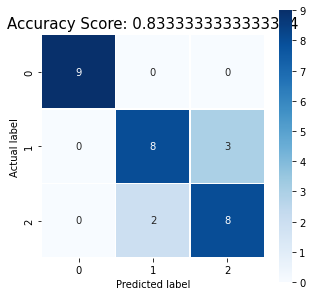

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(classifier.score(X_test, Y_test))
plt.title(all_sample_title, size = 15)

[Text(125.55000000000001, 190.26, 'X[3] <= 0.7\ngini = 0.667\nsamples = 120\nvalue = [41, 39, 40]'),
 Text(83.7, 135.9, 'gini = 0.0\nsamples = 41\nvalue = [41, 0, 0]'),
 Text(167.4, 135.9, 'X[3] <= 1.55\ngini = 0.5\nsamples = 79\nvalue = [0, 39, 40]'),
 Text(83.7, 81.53999999999999, 'X[2] <= 5.25\ngini = 0.051\nsamples = 38\nvalue = [0, 37, 1]'),
 Text(41.85, 27.180000000000007, 'gini = 0.0\nsamples = 37\nvalue = [0, 37, 0]'),
 Text(125.55000000000001, 27.180000000000007, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(251.10000000000002, 81.53999999999999, 'X[2] <= 5.05\ngini = 0.093\nsamples = 41\nvalue = [0, 2, 39]'),
 Text(209.25, 27.180000000000007, 'gini = 0.375\nsamples = 8\nvalue = [0, 2, 6]'),
 Text(292.95, 27.180000000000007, 'gini = 0.0\nsamples = 33\nvalue = [0, 0, 33]')]

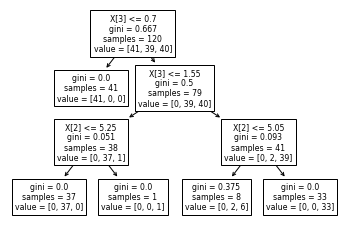

In [22]:
# Once trained, you can plot the tree with the plot_tree function:
tree.plot_tree(classifier) 